In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)

x_train: (50000, 32, 32, 3)


In [24]:
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr


w1: (3072, 10)
b1: (10,)


In [25]:
iterations =  300
lr = 1.3e-2
lr_decay=0.999
reg = 5e-6
train_loss_history = []
test_loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x_t = x_train[indices]
    y_t = y_train[indices]
    
    # Forward pass
    y_pred_t = x_t.dot(w1) + b1
    y_pred_v = x_test.dot(w1) + b1
    # Calculate loss 
    train_loss = 1./batch_size*np.square(y_pred_t-y_t).sum() + reg* np.sum(w1*w1)
    train_loss_history.append(train_loss)
    
    test_loss = 1./Nte*np.square(y_pred_v-y_test).sum() + reg* np.sum(w1*w1)
    test_loss_history.append(test_loss)
    #Calculate accuracy
    train_acc= (1/Ntr)*(np.abs(np.argmax(y_t, axis=1)==np.argmax(y_pred_t, axis=1))).sum()
    train_acc_history.append(train_acc)

    val_acc=(1/Nte)*(np.abs(np.argmax(y_test, axis=1)==np.argmax(y_pred_v, axis=1))).sum()
    val_acc_history.append(val_acc)

    if t%10==0:
        print('Epochs %d / %d , learning rate: %f , train loss %f , test loss %f , train accuracy %f , test accuracy %f' % (t, iterations, lr, train_loss, test_loss, train_acc, val_acc))
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred_t-y_t)
    dw1=x_t.T.dot(dy_pred) + reg*w1
    db1=dy_pred.sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    lr *=lr_decay


Epochs 0 / 300 , learning rate: 0.013000 , train loss 0.999956 , test loss 0.999956 , train accuracy 0.135940 , test accuracy 0.136100
Epochs 10 / 300 , learning rate: 0.012871 , train loss 0.880178 , test loss 0.879747 , train accuracy 0.351340 , test accuracy 0.349000
Epochs 20 / 300 , learning rate: 0.012742 , train loss 0.846298 , test loss 0.846141 , train accuracy 0.370560 , test accuracy 0.372600
Epochs 30 / 300 , learning rate: 0.012616 , train loss 0.826950 , test loss 0.827001 , train accuracy 0.380300 , test accuracy 0.380000
Epochs 40 / 300 , learning rate: 0.012490 , train loss 0.815138 , test loss 0.815392 , train accuracy 0.386420 , test accuracy 0.386900
Epochs 50 / 300 , learning rate: 0.012366 , train loss 0.807639 , test loss 0.808100 , train accuracy 0.391180 , test accuracy 0.389400
Epochs 60 / 300 , learning rate: 0.012243 , train loss 0.802692 , test loss 0.803364 , train accuracy 0.394820 , test accuracy 0.391300
Epochs 70 / 300 , learning rate: 0.012121 , train

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

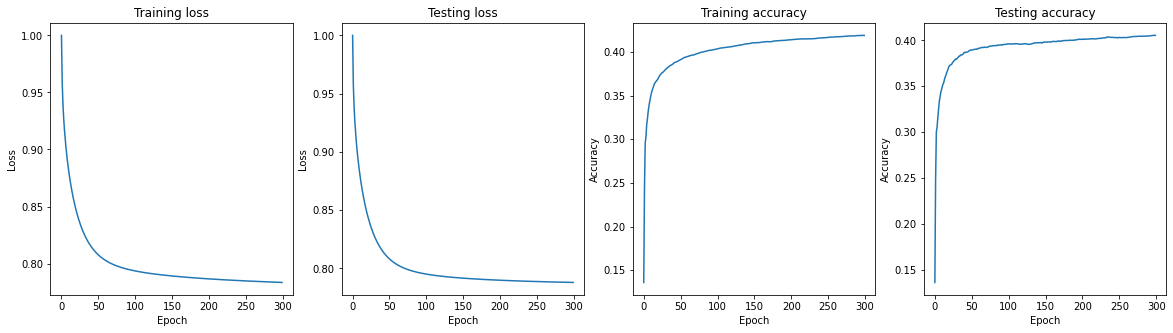

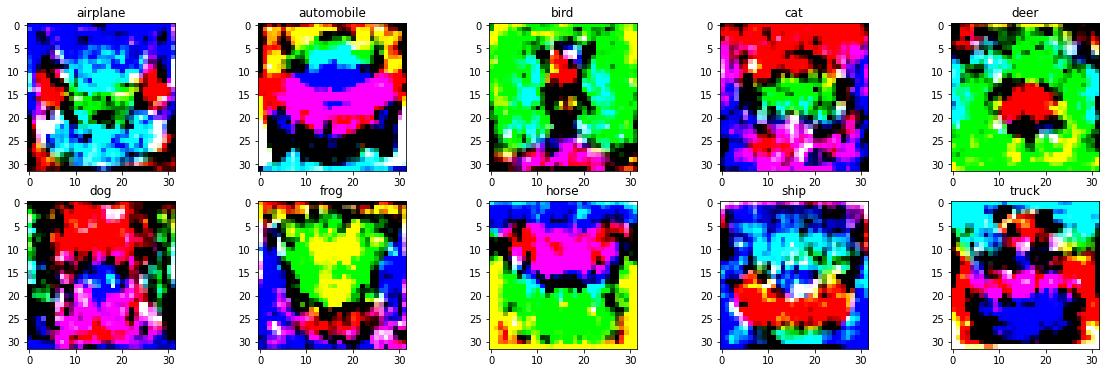

x_train -> (50000, 3072)


In [38]:
# Plotting losses and accuracies and displaying w as images
fig , ax = plt.subplots(figsize=(20,5 ))
plt.subplot(1,4,1)
plt.plot(train_loss_history)
plt.title("Training loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,2)
plt.plot(test_loss_history)
plt.title("Testing loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1,4,3)
plt.plot(train_acc_history)
plt.title("Training accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,4,4)
plt.plot(val_acc_history)
plt.title("Testing accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
f, axarr = plt.subplots(2,5)
f.set_size_inches(20,6)
for i in range(2):
    for j in range(5):
        img = w1[:, 5*i+j].reshape(32, 32, 3)
        axarr[i,j].imshow(img*1000)
        axarr[i,j].set_title(class_names[5*i+j])
plt.show()

x_t=x_train
print('x_train ->' , x_t.shape)
y_pred=x_t.dot(w1)+b1

